<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 · Visualización de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC2: Estudio de técnicas de visualización de datos

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Desiderio Martí Alcaraz<br/>
    <strong>DNI:</strong> 52769480M<br/>
    <strong>Correo:</strong> dmartial@uoc.edu<br/>
</div>

# 1. Heatmap
## Técnica de visualización

<ul>
    <li><b>Nombre</b>: Heatmap o Mapa de Calor</li>
    <li><b>Origen</b>: Los mapas de calor se originaron en 2D, mostrando los valores en una matriz de datos. Los valores más grandes se representaban en pequeños cuadrados (píxeles) grises o negros y los valores más pequeños en otros cuadrados más claros. El diseñador de software Cormac Kinney registró el término «mapa de calor» en 1991 para representar una muestra de información del mercado financiero en 2D. (fuente https://es.wikipedia.org/wiki/Mapa_de_calor)</li>
    <li><b>Descripción</b>: Un mapa de calor es una representación visual de datos en forma de una matriz en la que los valores individuales están representados como colores. Se utiliza para visualizar la intensidad de una variable en función de otras 2 variables. Los colores más oscuros suelen indicar valores más altos y los mas claros valores más bajos (en función del contexto puede ser al contrario). Existen dos categorías fundamentales de mapas de calor: el mapa de calor de análisis de grupos y el mapa de calor espacial</li>
    <li><b>Ejemplos de Aplicación</b>:
      <ul>
        <li><b>Ciencia de Datos</b>: Exploración de correlaciones en un conjunto de datos.</li>
        <li><b>Biología</b>: Visualización de la expresión genética.</li>
      </ul>
    </li>
</ul>

## Tipos de datos a representar

<ul>
    <li><b>Tipo de Datos Representados</b>: Se utiliza para visualizar normalmente una variable cuantitativa y representar la relación entre dos variables continuas o discretas </li>
    <li><b>Estructura de Datos</b>: Es una matriz bidimensional donde cada celda de la matriz representa un valor en la intersección de una fila y una columna.</li>
    <li><b>Limitaciones</b>: 
      <ul>
        <li><b>Tamaño del Conjunto de Datos</b>: Los mapas de calor son más efectivos con conjuntos de datos de tamaño moderado a grande para revelar patrones significativos. También hay que tener cuidado con los volumenes de datos de las variables dependientes en el caso de que sean valores discretos (como es en nuestro caso)</li>
      </ul>
    </li>
</ul>


## Origen de datos elegido
<ul>
    <li><b>Repositorio de datos elegido</b>: The Home of the U.S. Government's Open Data</li>
    <li><b>Url</b>: <a target="blank" href='https://data.gov/'>https://data.gov/</a></li>
    <li><b>Dataset elegido</b>: Crime Data from 2020 to Present - City of Los Angeles</li>
    <li><b>Descripción</b>: This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there.</li>
    <li><b>Url info dataset</b>: <a target="blank" href='https://catalog.data.gov/dataset/crime-data-from-2020-to-present'>https://catalog.data.gov/dataset/crime-data-from-2020-to-present</a> </li>
    <li><b>Url dataset</b>: <a target="blank" href='https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'>https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD</a></li>
    <li><b>Publicador</b>: data.lacity.org </li>
    <li><b>Licencia</b>: <a target="blank" href='http://creativecommons.org/publicdomain/zero/1.0/legalcode'>http://creativecommons.org/publicdomain/zero/1.0/legalcode</a> </li>
</ul>

En el siguiente código se obtienen los datos del dataset y se muestra una serie de información de utilidad para conocer por ejemplo el número de registros, número de columnas y otros datos similares de utilidad a la hora de conocer el dataset y poder procesar los datos del mismo.


In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ruta al archivo CSV
archivo_csv = os.path.join('datasets', 'Crime_Data_from_2020_to_Present.csv')

# Cargar datos desde el archivo CSV
df_original = pd.read_csv(archivo_csv, sep=',')

## Transformaciónes realizadas
Como el dataset es muy grande y tiene muchos tipos de asaltos nos vamos a centrar en los 20 tipos de asalto más comunes, para ello primero calculamos los tipos de asalto más comunes y filtramos aquellos registros dentro de nuestro dataset que tienen ese tipo de asalto.
Con esto conseguimos tener un mapa de calor con menos registros y más manejable.

In [23]:
# Contar la frecuencia de cada tipo de producto
frecuencia_tipos = df_original['Crm Cd Desc'].value_counts()
# print(frecuencia_tipos)

# Seleccionar los 20 tipos de productos más comunes
tipos_mas_comunes = frecuencia_tipos.head(20).index
# print(tipos_mas_comunes)

# Filtrar el DataFrame para quedarte solo con los 10 tipos de productos más comunes
df_top_20 = df_original[df_original['Crm Cd Desc'].isin(tipos_mas_comunes)]

df_top_20.to_csv('./datasets/Crime_Data_from_2020_to_Present_reducido_top20.csv', index=False)
# print(df_top_20.head())
# print(df_top_20.describe())
# print(df_top_20.shape)
# print(df_top_20.columns)

PD: se ha reducido el dataset a 399000 registros por la limitación de Github a no soportar ficheros de más de 100MB

## Representación de los datos

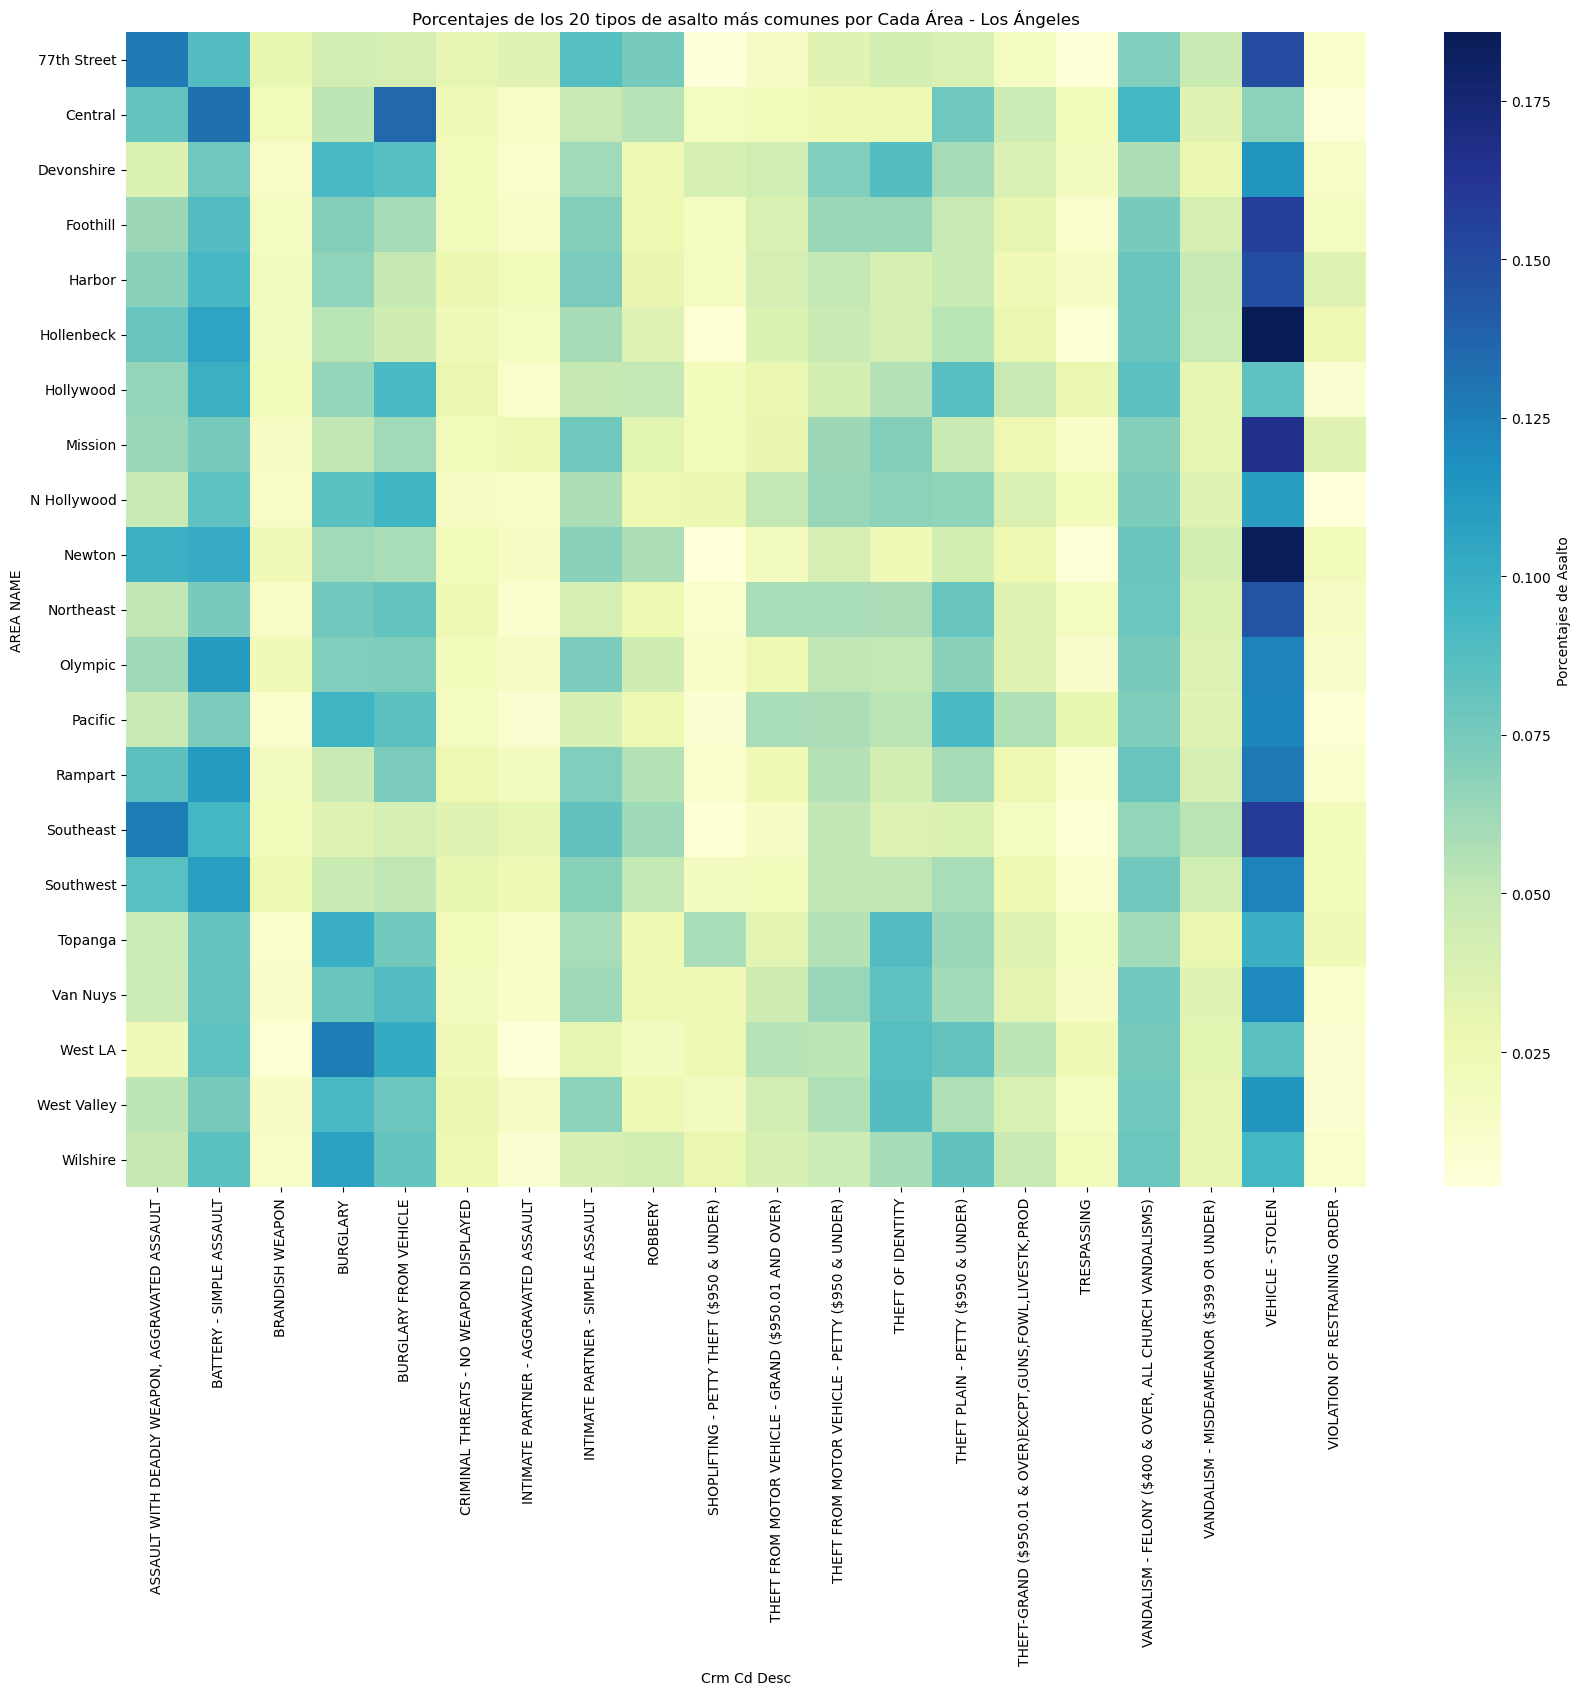

In [24]:
probabilidad_asalto = df_top_20.groupby(['AREA NAME', 'Crm Cd Desc']).size() / df_top_20.groupby('AREA NAME').size()
probabilidad_asalto = probabilidad_asalto.unstack().fillna(0)

plt.figure(figsize=(20, 15))
sns.heatmap(probabilidad_asalto, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Porcentajes de Asalto'})

plt.title('Porcentajes de los 20 tipos de asalto más comunes por Cada Área - Los Ángeles')
plt.show()

### Comentarios sobre la representación
En este gráfico podemos observar de una forma muy rápida varias conclusiones:
- Que el robo de vehículos es el tipo de asalto más común casi en todas las áreas.
- Que hay áreas dentro de los ángeles donde prácticamente no se producen asaltos (Wilshire) y otras donde se producen más asaltos.
- Podemos hacer un mapa de las áreas donde se producen más asaltos y donde se producen menos así como los tipos de asaltos mñas comunes y menos comunes.


# 2. Sunburst chart
## Técnica de visualización

<ul>
    <li><b>Nombre</b>: Sunburst Chart (Gráfico Sunburst).</li>
    <li><b>Origen</b>: Los gráficos Sunburst son una evolución de los gráficos de anillo y se han popularizado en la visualización de datos jerarquicos de forma interactiva.</li>
    <li><b>Descripción</b>: Un gráfico Sunburst es una representación visual de datos jerárquicos que se organiza en anillos concéntricos. Cada anillo representa un nivel jerárquico, y las secciones en cada anillo se dividen proporcionalmente según los valores que representan. La estructura se asemeja a los anillos de un árbol, y la forma general del gráfico se parece a un sol (sunburst en inglés), de ahí su nombre. Estos gráficos son particularmente útiles para mostrar la descomposición de un todo en sus partes.</li>
    <li><b>Ejemplos de Aplicación</b>:
      <ul>
        <li><b>Organización Empresarial</b>: Visualización de la estructura jerárquica de una empresa.</li>
        <li><b>Desglose de Gastos</b>: Representación de cómo se distribuyen los gastos en un presupuesto.</li>
      </ul>
    </li>
</ul>

## Tipos de datos a representar

<ul>
    <li><b>Tipo de Datos Representados</b>: Datos jerárquicos. Muestra la relación entre un elemento principal y sus subelementos.</li>
    <li><b>Estructura de Datos</b>: La estructura de datos se organiza jerárquicamente. Cada nivel jerárquico se representa en un anillo, y las secciones de cada anillo representan las subcategorías o subdivisiones de la categoría superior.</li>
    <li><b>Limitaciones</b>: 
      <ul>
        <li><b>Complejidad</b>: Puede volverse difícil de interpretar con muchas capas o niveles.</li>
        <li><b>Espacio</b>: Requiere espacio suficiente para mostrar todos los niveles de manera clara.</li>
      </ul>
    </li>
</ul>


## Origen de datos elegido
<ul>
    <li><b>Repositorio de datos elegido</b>: Portal datos abiertos del Gobierno de España</li>
    <li><b>Url</b>: <a target="blank" href='https://datos.gob.es/es'>https://datos.gob.es/es</a> </li>
    <li><b>Dataset elegido</b>: Ocupados por situación profesional, sexo y sector económico, por comunidad autónoma. EPA (Identificador API: 4018) </li>
    <li><b>Descripción</b>: Tabla de INEbase Ocupados por situación profesional, sexo y sector económico, por comunidad autónoma. Trimestral. Comunidades y Ciudades Autónomas. Encuesta de Población Activa (EPA)</li>
    <li><b>Url info dataset</b>: <a target="blank" href='https://datos.gob.es/es/catalogo/ea0010587-ocupados-por-situacion-profesional-sexo-y-sector-economico-por-comunidad-autonoma-epa-identificador-api-4018'></a></li>
    <li><b>Url dataset</b>: <a target="blank" href='https://www.ine.es/jaxiT3/files/t/csv_bdsc/4018.csv'>https://www.ine.es/jaxiT3/files/t/csv_bdsc/4018.csv</a> </li>
    <li><b>Publicador</b>: Instituto Nacional de Estadística (MINISTERIO DE ASUNTOS ECONÓMICOS Y TRANSFORMACIÓN DIGITAL)</li>
    <li><b>Licencia</b>: <a target="blank" href='https://www.ine.es/aviso_legal'>https://www.ine.es/aviso_legal</a></li>
</ul>

En el siguiente código se obtienen los datos del dataset y se muestra una serie de información de utilidad para conocer por ejemplo el número de registros, número de columnas y otros datos similares de utilidad a la hora de conocer el dataset y poder procesar los datos del mismo.

In [28]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

# Ruta al archivo CSV
archivo_csv = os.path.join('datasets', '4018.csv')

# Cargar datos desde el archivo CSV
df = pd.read_csv(archivo_csv, sep=';')
# print(df.head())
# print(df.describe())
# print(df.shape)
# print(df.columns)


## Transformaciónes realizadas
Como hay mucha información de totales que no nos aporta para el estudio que vamos a realizar se han realizado estas transformaciones:
- Eliminación de registros sin valores en columna Total
- Conversión de columna Total a numérica
- Eliminamos registros que muestran totales nacionales, de sectores y situaciones.
- Filtramos solo los registros del periodo 2008T4 (Trimestre 4 del 2008)

In [29]:
# Cambiamos los valores .. por NA
# df['Total'] = df['Total'].replace('..', pd.NA)
df['Total'] = df['Total'].replace({',': '.', '\.': ''}, regex=True).replace('..', pd.NA)

# Eliminamos las filas con valores NaN en la columna 'Total'
df = df.dropna(subset=['Total'])
# print(df.head())

# Convertimos la columna 'Total' a tipo numérico
df['Total_numeric'] = pd.to_numeric(df['Total'], errors='coerce')
# df['Total_numeric'] = pd.to_numeric(df['Total'].replace('..', pd.NA), errors='coerce')

# Eliminamos los totales de todas las columnas a visualizar
df_filtrado = df[(df['Comunidades y Ciudades Autónomas'] != 'Total Nacional') & (df['Sector económico'] != 'Total') & (df['Situación profesional'] != 'Total')]
# print(df_filtrado.head())

# Filtramos solo por el periodo concreto y para ambos sexos
df_filtrado = df_filtrado[(df_filtrado['Periodo'] == '2008T4') & (df_filtrado['Sexo'] == 'Ambos sexos')]
# print(df_filtrado.head())

## Representación de los datos

In [30]:
# Crear el gráfico sunburst
fig = px.sunburst(
    df_filtrado,
    path=['Comunidades y Ciudades Autónomas', 'Sector económico', 'Situación profesional'],
    values='Total_numeric',
    title='Ocupados por Comunidades / Ciudades Autónomas, Sector económico y Situación profesional (2008T4)',
    width=900,  
    height=800  
)

# Mostrar el gráfico
fig.show()

### Comentarios sobre la representación
En este gráfico podemos observar de una forma muy rápida varias conclusiones sobre el periodo 2008T4:
- Que la comunicadad con más ocupados en ese periodo fué Madrid, seguida por Cataluña, Andalucia y Comundad Valenciana.
- Que mayoritariamente el sector servicios es el que más ocupa a empleados, con muchísima diferencia con respecto al resto de sectores.
- Que la mayoría de empleados se hace a través de contrados asalariados.

Con un gráfico interactivo podríamos hacer drill down para ver mejor los detalles de comunidades concretas seleccionando las comunidades a visualizar.

# 3. Horizon graph
## Técnica de visualización

<ul>
    <li><b>Nombre</b>: Horizon Plot o Gráfico de Horizonte.</li>
    <li><b>Origen</b>: La técnica de Horizon Plot se originó en la visualización de series temporales y fue introducida por primera vez por Heer y Agrawala en 2009.</li>
    <li><b>Descripción</b>: Un Horizon Plot es una forma de visualizar series temporales comprimiendo la información en una visualización más compacta. Se divide el eje vertical en múltiples bandas (horizontes), cada una representando una porción de los datos. Cada banda se colorea para indicar la dirección y la magnitud del cambio en los datos en ese período de tiempo. El objetivo es proporcionar una visión general de la variabilidad y tendencia temporal de los datos.</li>
    <li><b>Ejemplos de Aplicación</b>:
      <ul>
        <li><b>Finanzas</b>: Seguimiento de la variación de precios de acciones a lo largo del tiempo.</li>
        <li><b>Meteorología</b>: Visualización de patrones climáticos a lo largo de los años.</li>>
      </ul>
    </li>
</ul>

## Tipos de datos a representar

<ul>
    <li><b>Tipo de Datos Representados </b>: Principalmente datos cuantitativos y temporales. Adecuado para series temporales continuas.</li>
    <li><b>Estructura de Datos </b>: Se requieren datos temporales unidimensionales. Cada punto de datos debe tener una marca de tiempo asociada.</li>
    <li><b>Limitaciones </b>: 
      <ul>
        <li><b>Cantidad de Datos </b>: A medida que aumenta el número de series la visualización puede volverse saturada y difícil de interpretar.</li>
        <li><b>Requiere Datos Temporales </b>: Es más eficaz para datos temporales y puede no ser tan útil para otros tipos de datos.</li>
      </ul>
    </li>
</ul>


## Origen de datos elegido
<ul>
    <li><b>Repositorio de datos elegido</b>: Portal de Datos Abiertos de la Generalitat Valenciana</li>
    <li><b>Url</b>: <a target="blank" href='https://portaldadesobertes.gva.es/es'>https://portaldadesobertes.gva.es/es</a> </li>
    <li><b>Dataset elegido</b>: COVID-19 Serie de casos con PDIA positiva en la Comunitat Valenciana, según fecha en la que el laboratorio notifica el diagnóstico</li>
    <li><b>Descripción</b>: Información del número de casos de COVID-19 en la Comunidad Valenciana, tanto información agrupada por provincia como detallada a nivel de departamentos de salud.</li>
    <li><b>Url info dataset</b>: <a target="blank" href='https://dadesobertes.gva.es/es/dataset/covid-19-series-casos-pdia-positiva/resource/cb50e7d2-0c0e-46b8-a359-a0fa35998577'>https://dadesobertes.gva.es/es/dataset/covid-19-series-casos-pdia-positiva/resource/cb50e7d2-0c0e-46b8-a359-a0fa35998577</a> </li>
    <li><b>Url dataset</b>: <a target="blank" href='https://dadesobertes.gva.es/dataset/ce195af2-39ec-4f44-bb77-b14235519b0d/resource/cb50e7d2-0c0e-46b8-a359-a0fa35998577/download/covid-19-serie-de-casos-con-pdia-positiva-en-la-comunitat-valenciana.csv'>https://dadesobertes.gva.es/dataset/ce195af2-39ec-4f44-bb77-b14235519b0d/resource/cb50e7d2-0c0e-46b8-a359-a0fa35998577/download/covid-19-serie-de-casos-con-pdia-positiva-en-la-comunitat-valenciana.csv</a> </li>
    <li><b>Publicador</b>: Generalitat Valenciana</li>
    <li><b>Licencia</b>: <a target="blank" href='http://www.opendefinition.org/licenses/cc-by'>http://www.opendefinition.org/licenses/cc-by</a></li>
</ul>


En el siguiente código se obtienen los datos del dataset y se muestra una serie de información de utilidad para conocer por ejemplo el número de registros, número de columnas y otros datos similares de utilidad a la hora de conocer el dataset y poder procesar los datos del mismo.

In [37]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

# Constantes para facilitar encontrar las columnas que vamos a estudiar
COLUMNAS = ['Data diagnòstic laboratori/fecha diagnóstico laboratorio', 'C.Valenciana', 'Homes/Hombres','Dones/Mujeres','Prov. Alacant/Alicante','Prov. Castelló/Castellón','Prov. València']
COL_FECHA = 0
COL_ALICANTE = 4
COL_CASTELLON = 5
COL_VALENCIA = 6

# Ruta al archivo CSV
archivo_csv = os.path.join('datasets', 'covid-19-serie-de-casos-con-pdia-positiva-en-la-comunitat-valenciana.csv')

# Cargar datos desde el archivo CSV
df = pd.read_csv(archivo_csv, sep=';')
# print(df.head())
# print(df.describe())
# print(df.shape)
# print(df.columns)


## Representación de los datos

In [38]:
# Crear el gráfico de horizonte con plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=df[COLUMNAS[0]], y=df[COLUMNAS[COL_ALICANTE]], fill='tozeroy', name='Alicante'))
fig.add_trace(go.Scatter(x=df[COLUMNAS[0]], y=df[COLUMNAS[COL_CASTELLON]], fill='tozeroy', name='Castellón'))
fig.add_trace(go.Scatter(x=df[COLUMNAS[0]], y=df[COLUMNAS[COL_VALENCIA]], fill='tozeroy', name='Valencia'))

# Personalizar el diseño
fig.update_layout(
    title='COVID-19 Serie de casos con PDIA positiva en la Comunitat Valenciana - por provincias',
    xaxis_title='Fecha',
    yaxis_title='Casos de COVID',
    width=1000,  
    height=800  
)

# Mostrar el gráfico
fig.show()

### Comentarios sobre la representación
En la gráfica se puede ver la evolución en el tiempo de casos detectados de COVID en 3 series superpuestas, cada serie informa los valores agrupados de los centros de salud de cada provincia.
Este gráfico se podría mejorar haciendo que la selección de datos fuera interactiva para facilitar la selección de series, identificando los datos incluso a nivel de departamento de salud. 
No se han incluído los datos a nivel de centro de salud porque en este tipo de gráfino no tendría ningún sentido porque sería imposible idneitifcar cada uno de los valores de las series.